In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.pylab as pl

In [3]:
%matplotlib notebook

In [4]:
os.getcwd()

'/Users/cyang/coding/projects/dnpsoup0/py_scripts/case_studies/examples'

In [7]:
#os.listdir('../../../results/TOPDNP')

## Pulsed Solid Effect

In [8]:
datadir = '../../../results/TOPDNP'

#### Field Profile

In [9]:
filename = 'eHH_pSE_xband_4MHz_loop500_zcw34_em_fp.result'

In [10]:
filepath = os.path.join(datadir, filename)
df = pd.read_csv(filepath, skiprows=1, header=None)
df.head()

,0,1
0,9785000000,4.339516
1,9785100000,4.372249
2,9785200000,4.403204
3,9785300000,4.432307
4,9785400000,4.459492


In [11]:
df.shape

(600, 2)

<IPython.core.display.Javascript object>


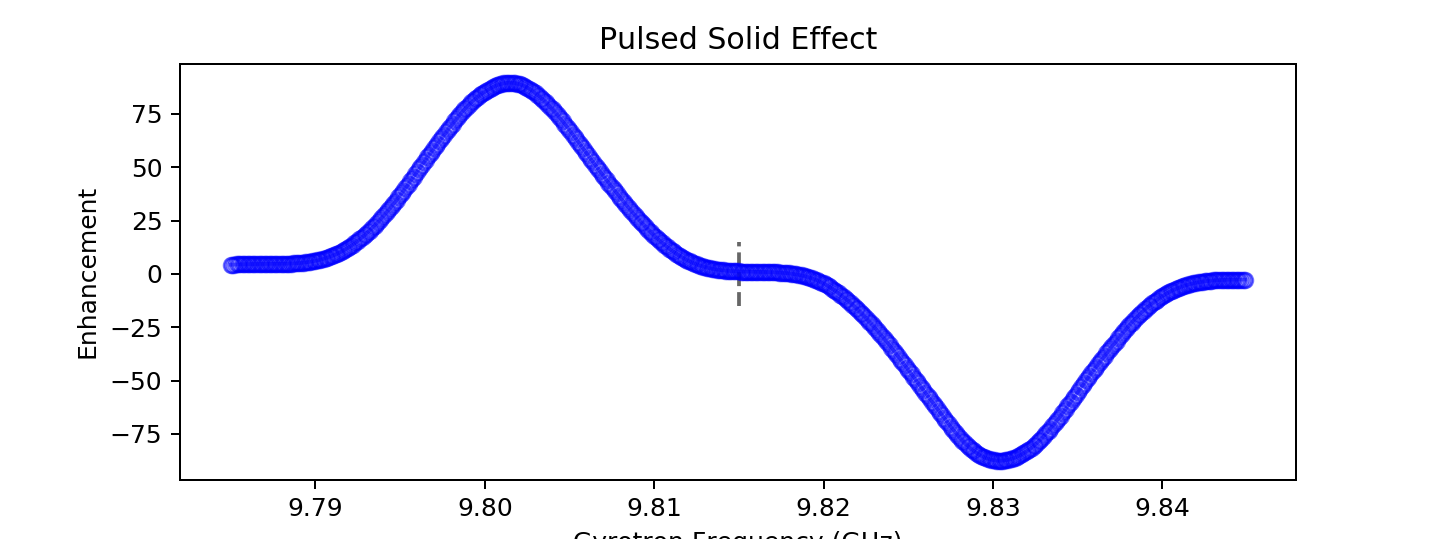

In [12]:
fig = plt.figure(figsize=(8, 3))
plt.plot(df[0]/1e9, df[1], 'bo-', markerfacecolor='none', alpha=0.5)
plt.vlines(9.815, -15, 15, linestyles='dashed', alpha=0.6)
plt.xlabel('Gyrotron Frequency (GHz)')
plt.ylabel('Enhancement')
plt.title('Pulsed Solid Effect')
plt.show()

## TOP-DNP

### X-Band

In [30]:
datadir = '../../../results/v2/TOPDNP'

In [31]:
res = [elem for elem in os.listdir(datadir) if 'xband' in elem ]
res

['eH_TOPDNP_xband_4MHz_loop512_oct55_em_fp.result',
 'eH_TOPDNP_xband_4MHz_loop4000_oct233_em_fp.result',
 'eH_TOPDNP_xband_4MHz_loop4000_oct55_em_fp.result']

#### Field Profile

            0           1
0  9785500000  189.882276
1  9786000000  241.983706
2  9786500000  276.784865
3  9787000000  290.800752
4  9787500000  296.153222


<IPython.core.display.Javascript object>


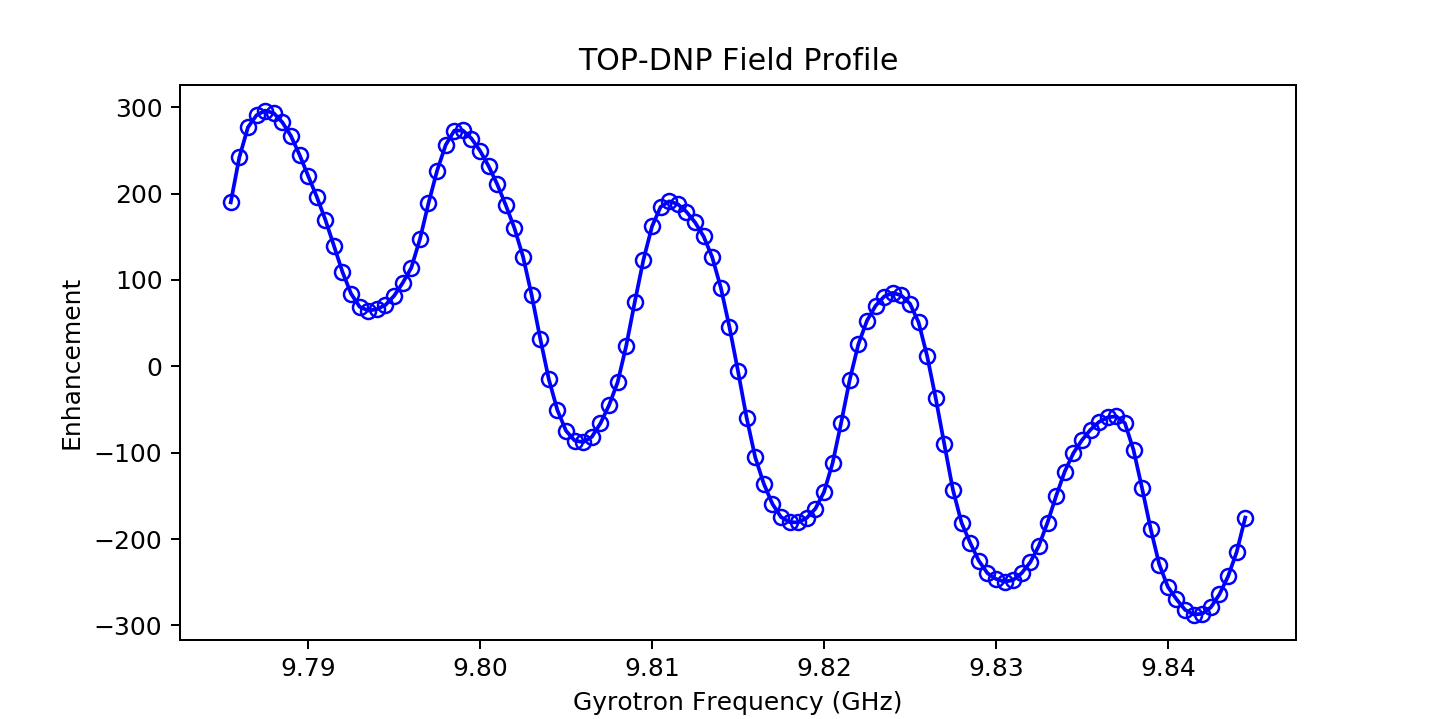

In [33]:
filename = 'eH_TOPDNP_xband_4MHz_loop4000_oct233_em_fp.result'
filepath = os.path.join(datadir, filename)
df = pd.read_csv(filepath, skiprows=2, header=None)
print(df.head())
fig = plt.figure(figsize=(8, 4))
plt.plot(df[0]/1e9, df[1], 'bo-', markerfacecolor='none')
plt.xlabel('Gyrotron Frequency (GHz)')
plt.ylabel('Enhancement')
plt.title('TOP-DNP Field Profile')
plt.show()

### 18.8 T (800 MHz)

In [20]:
datadir = '../../../results/v2/TOPDNP'

<IPython.core.display.Javascript object>


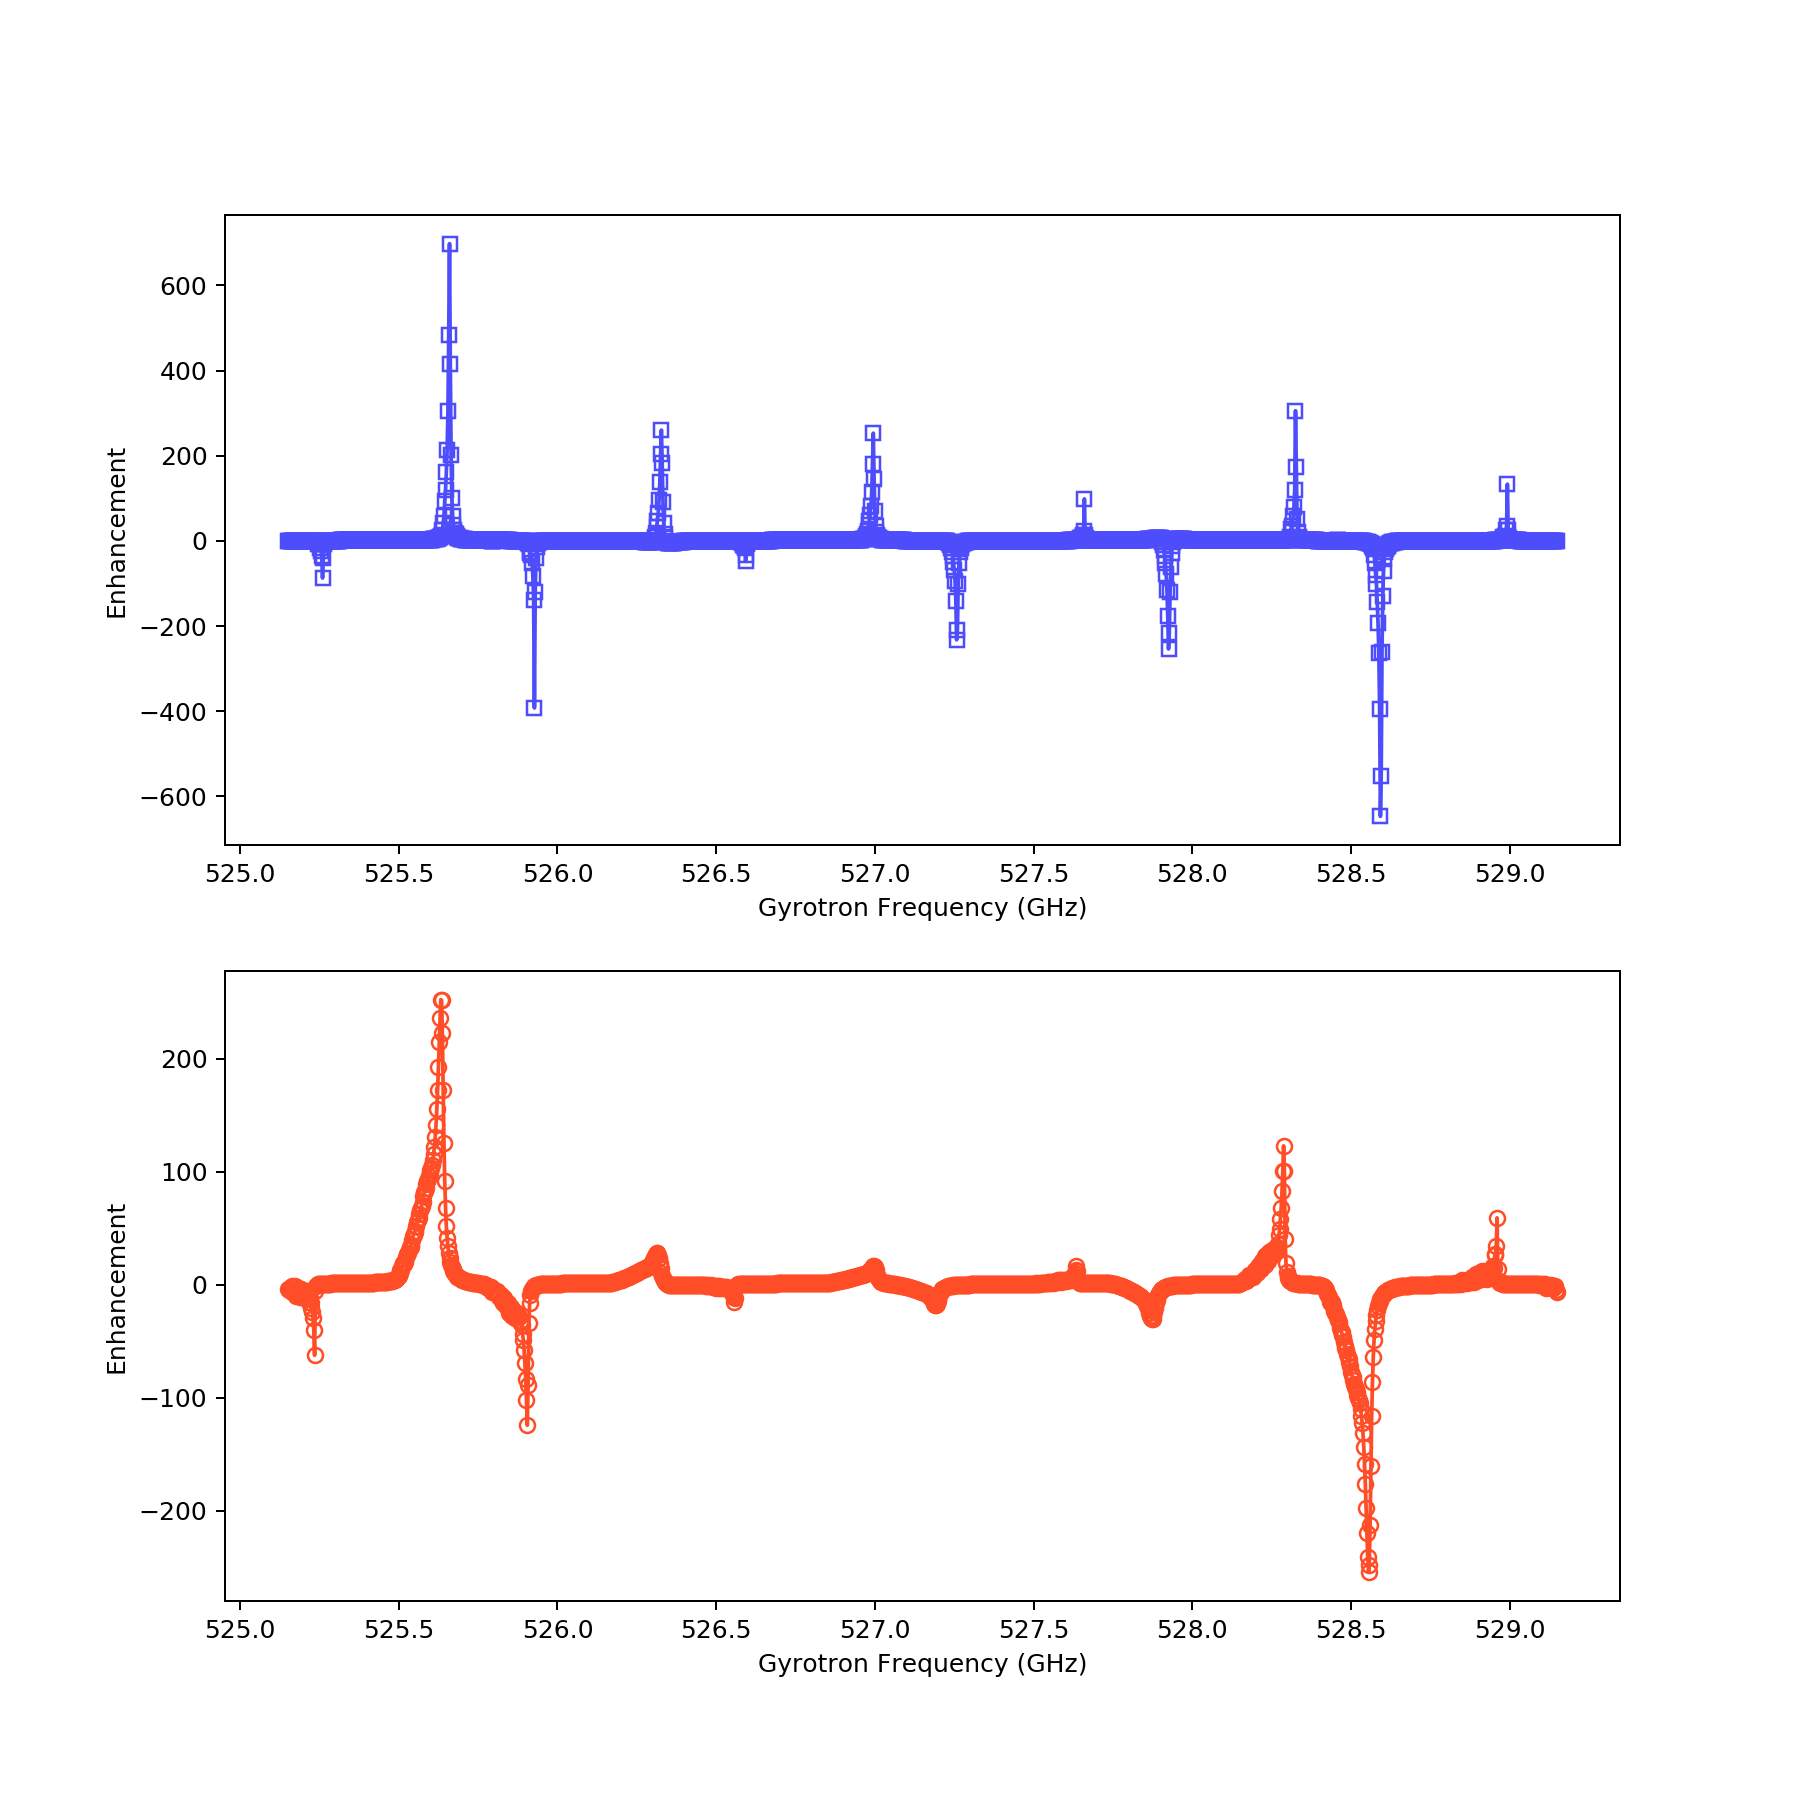

In [25]:
filenames = [
    'eHH_x0_y0_z4p5_x2p6_y0_z3p7_gtensor_a30b90g70_TOPDNP_800MHz_50MHz_train8192_loop262145_oct144_em_fp_step0p0025.result',
    'eHH_x0_y0_z4p5_x2p6_y0_z3p7_gtensor_trityl_a30b90g70_TOPDNP_800MHz_200MHz_train8192_loop262145_oct233_em_fp_step0p0025.result'
]
n = len(filenames)
colors = plt.cm.rainbow(np.linspace(0.1,0.9,n))
labels = [
    '50 MHz eHH',
    '200 MHz trityl eHH oct233'
]
markers = [
    's',
    'o'
]

dfs = []
for filename in filenames:
    filepath = os.path.join(datadir, filename)
    df_temp = pd.read_csv(filepath, skiprows=2, header=None)
    dfs.append(df_temp)
df_temp = None

fig, axes = plt.subplots(n, 1, figsize=(10, 10))
idx = 0
for df, c, m, label in zip(dfs, colors, markers, labels):
    axes[idx].plot(df[0]/1e9, df[1], linestyle='-', color=c, marker=m, markerfacecolor='none', label=label)
    axes[idx].vlines(527.15, 0.9, 1.1, color='k', linestyles='dashed')
    axes[idx].set_xlabel('Gyrotron Frequency (GHz)')
    axes[idx].set_ylabel('Enhancement')
    idx += 1
# plt.xlim(526.1, 526.5)
# plt.xlim(525.6, 525.9)
# plt.xlim(525.15, 527.1)
# plt.ylim(-80, 150)
# plt.title('TOP-DNP Field Profile')
# plt.legend()
plt.show()